In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpl_style

from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from kernal import linear, polynomial, rbf

# Ej 1

### a) Construct a set 'TP3-1' of linearly separable examples at < 2 (e.g., randomly generate points in [0, 5]x[0, 5] such that they belong to two linearly separable classes 1 and -1). Use a simple step perceptron to separate the ensemble linearly. Is the separation hyperplane optimal? Justify the answer.

§

In [2]:
# This is for the spliting line function
n_items = 500
b0 = 2
b1 = -3
b2 = 3

### Defenitions for plotting and perceptron

In [3]:
def plotting(data, b0=b0, b1=b1, b2=b2, line=True):

    #For the line in the plot
    if line:
        x1_for_line = np.linspace(0, 5, 100)
        x2_for_line = (-b0 - b1 * x1_for_line) / b2

    plt.figure(figsize=(5, 4))
    plt.plot(x1_for_line, x2_for_line, label=f'{b0} + {b1}x1 + {b2}x2', color='blue')
    plt.scatter(data['x1'], data['x2'], label='Data', c=data['y'], marker='o')

    # plt.scatter(data['x1'], data['x2'], label='y', c='y', marker='o')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    # plt.legend()
    plt.show()

In [4]:
# perceptron
def perceptron_train(X, y, learning_rate=0.1, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction > 0:
                y_pred = 1
            else:
                y_pred = -1
            
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
    
    return weights, bias

### Data creation
train_1, test_1, train_2, test_2

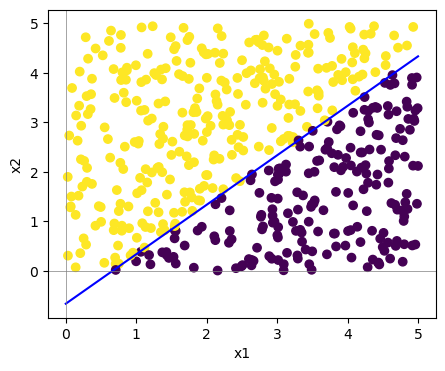

In [5]:
# the following is for the linespace representation of the line in the plot
x1_for_line = np.linspace(0, 5, 100)
x2_for_line = (-b0 - b1 * x1_for_line) / b2

x1 = [random.uniform(0, 5) for i in range(n_items)]
x2 = [random.uniform(0, 5) for i in range(n_items)]
y = [1 if (b0 + b1 * x1[i] + b2 * x2[i]) > 0 else -1 for i in range(n_items)]

# create TP3_1, TP3_2, and creating a train test split
TP3_1 = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
TP3_2 = TP3_1.copy()
train_1, test_1 = train_test_split(TP3_1, test_size=0.3)
train_2, test_2 = train_test_split(TP3_2, test_size=0.3)

plotting(TP3_1)

### Training

In [6]:
# perform the perceptron training
weights, bias = perceptron_train(train_1[['x1', 'x2']].values, train_1['y'].values, n_epochs=100, learning_rate=0.1)
print(f'Final weights: {weights}\nFinal bias: {bias}\n\nHyperplane: {bias.round(2)} + {weights[0].round(2)}x1 + {weights[1].round(2)}x2')

Final weights: [-4.18519684  4.15089655]
Final bias: 2.8000000000000003

Hyperplane: 2.8 + -4.19x1 + 4.15x2


### Prediction

In [7]:
y_pred_1 = np.dot(test_1[['x1', 'x2']].values, weights) + bias
y_pred_1 = np.where(y_pred_1 > 0, 1, -1)

# Calculate the classification report from sklearn metrics
report = classification_report(test_1['y'], y_pred_1)
print(report)

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99        65
           1       1.00      0.99      0.99        85

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150




### b) Obtain the optimal hyperplane from the hyperplane obtained with the perceptron simple.

Normalizing factor: 0.7142857142857142
Final weights: [-2.98942631  2.96492611]
Final bias: 2.0

Hyperplane: 2.0 + -2.99x1 + 2.96x2


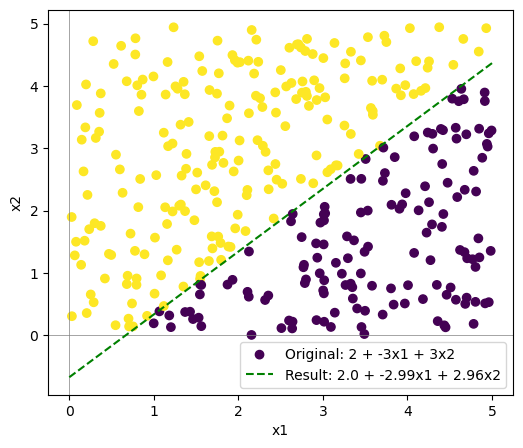

In [8]:
# First normalize the model to b0 so that the models b0 will be the same as the generated data b0
normalizing_factor = b0/bias
weights_normalized = weights * normalizing_factor
bias_normalized = bias * normalizing_factor

print(f'Normalizing factor: {normalizing_factor}')
print(f'Final weights: {weights_normalized}\nFinal bias: {bias_normalized}\n\nHyperplane: {bias_normalized.round(2)} + {weights_normalized[0].round(2)}x1 + {weights_normalized[1].round(2)}x2')



# plotting the output
x_boundary = np.linspace(0, 5, 100)
y_boundary = (-weights[0] * x_boundary - bias) / weights[1]

# plotting the output
plt.figure(figsize=(6, 5))
plt.scatter(train_1['x1'], train_1['x2'], label=f"Original: {b0} + {b1}x1 + {b2}x2", c=train_1['y'], marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.plot(x_boundary, y_boundary, label=f"Result: {round(bias_normalized, 2)} + {round(weights_normalized[0], 2)}x1 + {weights_normalized[1].round(2)}x2", color='green', linestyle='--')
plt.legend()
plt.show()

### c) Construct the set 'TP3-2' in an analogous way to how you constructed the set 'TP3-1' but this time include some examples that are misclassified near the separating hyperplane. Use a simple perceptron to separate the two classes. Comment on the results.

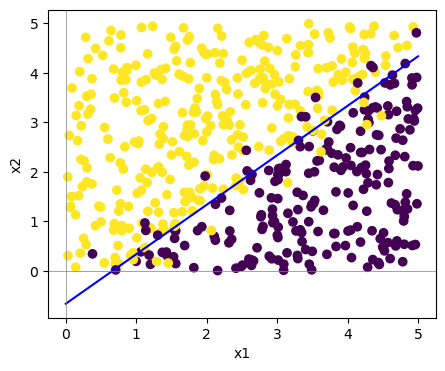

,x1,x2,y
0,1.489851,4.718902,1
1,1.607176,3.973444,1
2,3.287622,0.309249,-1
3,4.311888,2.450755,-1
4,0.352713,3.266560,1


In [27]:
n_additional_points = round(n_items / 10)
additional_data = []

# Generate additional data points near the separating hyperplane
for _ in range(n_additional_points):
    x1_new = random.uniform(0, 5)
    x2_new = random.uniform(0, 5)
    
    # Calculate the distance from the point to the separating hyperplane
    distance = abs(b0 + b1 * x1_new + b2 * x2_new) / (b1 ** 2 + b2 ** 2) ** 0.5
    
    # Check if the distance is less than 0.5 (within 0.5 units from the hyperplane), if so, append.
    if distance <= 0.5:
        class_label = 1 if not (b0 + b1 * x1_new + b2 * x2_new) > 0 else -1
        additional_data.append({'x1': x1_new, 'x2': x2_new, 'y': (class_label)}) # for some reason it does it oposite so -1 to fix


additional_df = pd.DataFrame(additional_data)
TP3_2 = pd.concat([TP3_2, additional_df], ignore_index=False)

plotting(TP3_2)
TP3_2.head()

### d) Use SVM to classify both set 'TP3-1' and set 'TP3-2'. Compare the results with those obtained in points a) and c).


In [58]:
class SVM:
    '''
    fit() uses data in a dataframe with x1, x2 and y
    predict() uses a list of features
    '''

    def __init__(self, visualization=False):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure(figsize=(6, 5))
            self.ax = self.fig.add_subplot(1, 1, 1)

    def fit(self, data):
        self.data = data
        opt_dic = {}

        transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]

        all_data = []

        # Iterate through the DataFrame rows
        for index, row in self.data.iterrows():             # Create a list of all the data (so not in a table anymore)
            for x in ['x1', 'x2']:
                featureset = [row[x]]
                all_data.append(featureset)
        
        self.max_feature_value = max(all_data)[0]           # Produces only one higest number of all data
        self.min_feature_value = min(all_data)[0]
        all_data = None                                     # clears memory

        step_sizes = [self.max_feature_value * 0.1, 
                      self.max_feature_value * 0.01, 
                      '''self.max_feature_value * 0.001''']       # This smallest step may take a lot of time to run

        b_range_multiple = 5
        b_multiple = 5
        self.latest_optimum = self.max_feature_value * 10

        for step in step_sizes:
            w = np.array([self.latest_optimum, self.latest_optimum])
            optimized = False

            while not optimized:
                for b in 

        return w



    def predict(self, features):
        classification = np.dot(test_1[['x1', 'x2']].values, weights) + bias
        classification = np.where(y_pred_1 > 0, 1, -1)

        return classification
        



svm = SVM()
result = svm.fit(TP3_2)

print(result)

[49.99215513 49.99215513]


None
